# Project Name: Big Data Mart Sales Problem


About Project: The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Train Dataset
ds= pd.read_csv('bigdatamart_Train.csv')
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df= pd.DataFrame(data=ds)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observations: Item_Weight is from 4.5 to 21.35. Item_MRP is not distributed normally as per mean and std. Some values are missing in Item_Weight.

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
# Checking for Object columns
object_columns= []

for i in df.columns:
    if df.dtypes[i]=='object':
        object_columns.append(i)
object_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCL31     9
FDW26     9
FDG09     9
         ..
FDN52     1
DRF48     1
FDE52     1
FDC23     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [11]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
#Renaming duplicate elements in Item_Fat_Content column

df['Item_Fat_Content']= df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [13]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [15]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [16]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [18]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [19]:
#Checking for Null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Observations: Null values present in Item_Weight and Outlet_Size.           

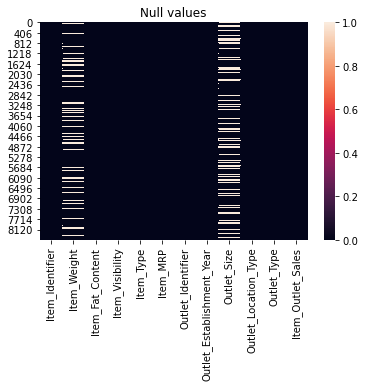

In [20]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

Observations: Null values present in Item_Weight and Outlet_Size.

In [21]:
df.dtypes.index

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [22]:
df.dtypes['Item_Identifier']

dtype('O')

In [23]:
#Filling Null values as per category using pivot
#filling Item_Weight as per Item_Identifier

item_weight_mean= df.pivot_table(values='Item_Weight', index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [24]:
miss_item_weight= df['Item_Weight'].isnull()
miss_item_weight

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [25]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_item_weight[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i]= item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i]= np.mean(df['Item_Weight'])

In [26]:
df['Item_Weight'].isnull().sum()

0

In [27]:
#Filling Null values as per category using pivot
#filling outlet_size as per outlet_type

outlet_size_mode= df.pivot_table(values= 'Outlet_Size', columns='Outlet_Type', aggfunc= (lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [28]:
miss_Outlet_Size= df['Outlet_Size'].isnull()
df.loc[miss_Outlet_Size, 'Outlet_Size'] = df.loc[miss_Outlet_Size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [29]:
df['Outlet_Size'].isnull().sum()

0

In [30]:
sum(df['Item_Visibility']==0)

526

In [31]:
#Replace zeros with mean
df.loc[:,'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [32]:
sum(df['Item_Visibility']==0)

0

In [33]:
#Creation of New attributes

df['New_Item_Type']= df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [34]:
df['New_Item_Type']= df['New_Item_Type'].map({'FD':'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [35]:
df.loc[df['New_Item_Type']== 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [36]:
#Create Small values for Establishment year

df['Outlet_Years']= 2013- df['Outlet_Establishment_Year']
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

# EDA

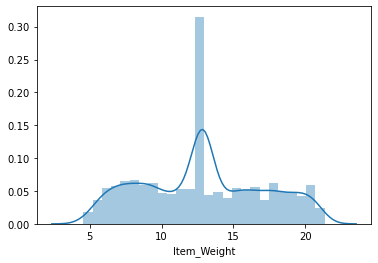

In [37]:
#1) Analysis of Numerical Data
sns.distplot(df['Item_Weight'])

Observations: Max Item_Weight is distributed in between 7 to 20.

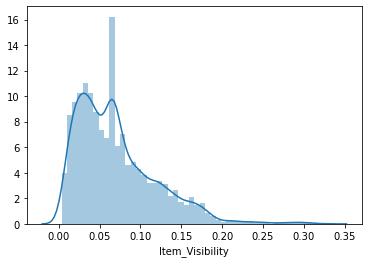

In [38]:
sns.distplot(df['Item_Visibility'])

Observations: Here we have some right skewd values. At centre max density arises as we filled zero values by mean.

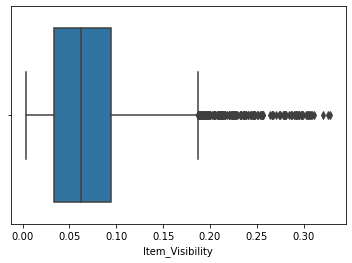

In [39]:
sns.boxplot(df['Item_Visibility'])

Observations: Here we have some outliers present in Item_Visibility.

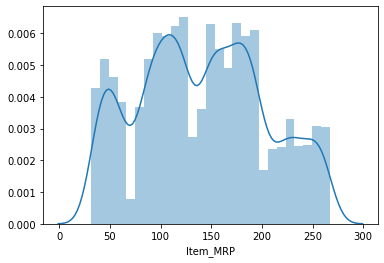

In [40]:
sns.distplot(df['Item_MRP'])

Observations: Prize of Item is ranges from around 30 to 260.

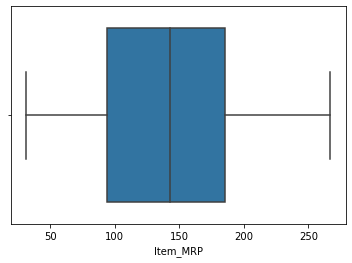

In [41]:
sns.boxplot(df['Item_MRP'])

Observations: No outliers present in Item_MRP

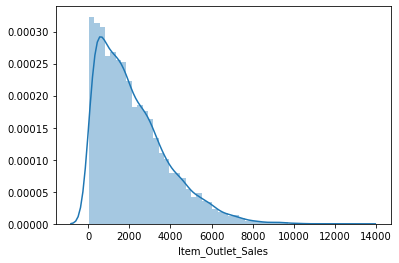

In [42]:
sns.distplot(df['Item_Outlet_Sales'])

Observations: Sales is ranges from 0 to 14000, also data is some what right skewed.

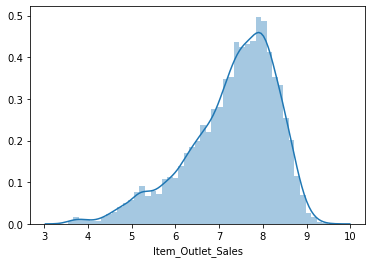

In [43]:
# Removing skewness of Item_Outlet_Sales

df['Item_Outlet_Sales']= np.log(1+df['Item_Outlet_Sales'])
sns.distplot(df['Item_Outlet_Sales'])

Observations: Now its almost Normal Discreibution for Item_Outlet_Sales.

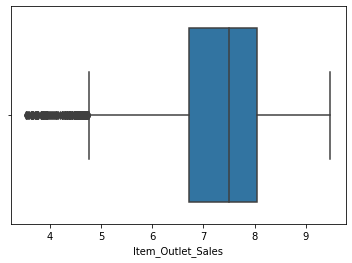

In [44]:
sns.boxplot(df['Item_Outlet_Sales'])

Observations: We have some outliers present in Item_Outlet_Sales.

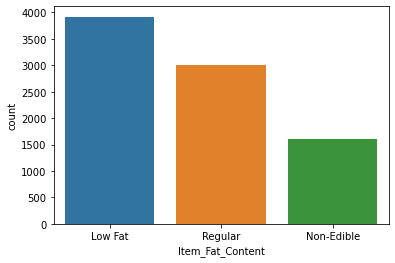

In [45]:
# 2) Analysis of Categorical Data

sns.countplot(df['Item_Fat_Content'])

Observations: Most of Items are Low Fat contains and less are Non-Edible.

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

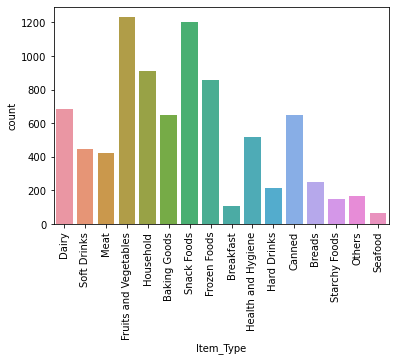

In [46]:
#plt.figure(figsize=(25,5))
#sns.countplot(df['Item_Type'])

#TO change lable in horizontal

l= list(df['Item_Type'].unique())
sns.countplot(df['Item_Type']).set_xticklabels(labels= l, rotation=90)


Observations: Maximum Item_Type are Fruits-Vegetables and Snack Foods.

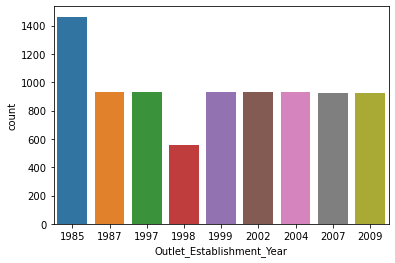

In [47]:
sns.countplot(df['Outlet_Establishment_Year'])

Observations: Here for 1985 we have more count and 1998 have less count, otherthan this all having equal count for Outlet establishment.

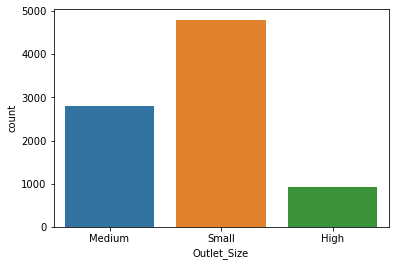

In [48]:
sns.countplot(df['Outlet_Size'])

Observations: Maximum Outlet size is small one. High is very less.

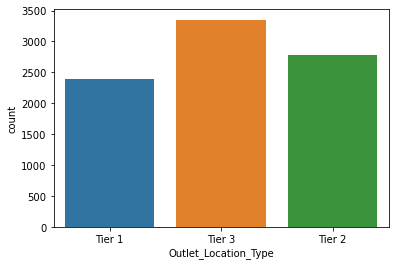

In [49]:
sns.countplot(df['Outlet_Location_Type'])

Observatons: Here almost eqaul disctribution present.

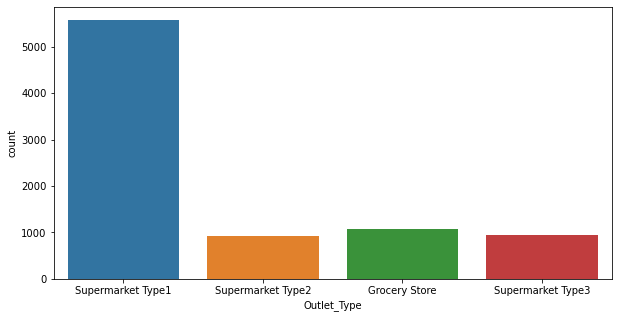

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(df['Outlet_Type'])

Observations: Most of outlets are Supermarket Type1.

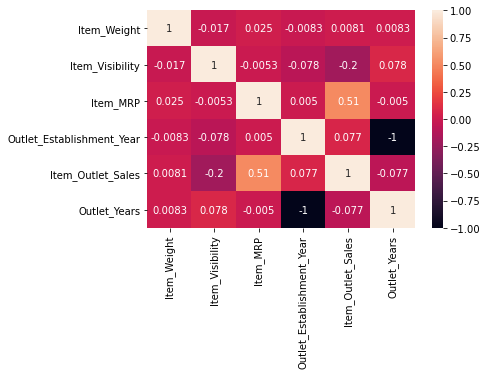

In [51]:
#Coorelation Matrix

sns.heatmap(df.corr(), annot= True)

Observations: Item_Outlet_Sales has major impact of Item_MRP. Other than this, other varibles not much more correlated.

# Encoding

In [52]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet']= le.fit_transform(df['Outlet_Identifier'])
col= ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']

for i in col:
    df[i]=le.fit_transform(df[i])
df.head()    

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,14,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,15,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,26,1


In [53]:
df= df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,9.30,0,0.016047,4,249.8092,1,0,1,8.225808,1,14,9
1,5.92,2,0.019278,14,48.2692,1,2,2,6.096776,0,4,3
2,17.50,0,0.016760,10,141.6180,1,0,1,7.648868,1,14,9
3,19.20,2,0.066132,6,182.0950,2,2,0,6.597664,1,15,0
4,8.93,1,0.066132,9,53.8614,0,2,1,6.903451,2,26,1


In [54]:
#Removing the Outliers

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
df_new= df[(z<3).all(axis=1)]
df_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,9.300,0,0.016047,4,249.8092,1,0,1,8.225808,1,14,9
1,5.920,2,0.019278,14,48.2692,1,2,2,6.096776,0,4,3
2,17.500,0,0.016760,10,141.6180,1,0,1,7.648868,1,14,9
3,19.200,2,0.066132,6,182.0950,2,2,0,6.597664,1,15,0
4,8.930,1,0.066132,9,53.8614,0,2,1,6.903451,2,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,7.929984,1,26,1
8519,8.380,2,0.046982,0,108.1570,2,1,1,6.310436,1,11,7
8520,10.600,1,0.035186,8,85.1224,2,1,1,7.085159,2,9,6
8521,7.210,2,0.145221,13,103.1332,1,2,2,7.521100,1,4,3


In [55]:
df.shape

(8523, 12)

In [56]:
df_new.shape

(8368, 12)

Observations: Almost 155 rows has been removed due to outliers.

In [57]:
#Spliting Data

x= df_new.drop('Item_Outlet_Sales', axis=1)
y= df_new['Item_Outlet_Sales']

In [58]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,9.30,0,0.016047,4,249.8092,1,0,1,1,14,9
1,5.92,2,0.019278,14,48.2692,1,2,2,0,4,3
2,17.50,0,0.016760,10,141.6180,1,0,1,1,14,9
3,19.20,2,0.066132,6,182.0950,2,2,0,1,15,0
4,8.93,1,0.066132,9,53.8614,0,2,1,2,26,1


In [59]:
y.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [60]:
# Standardization of Data

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_x= scaler.fit_transform(x)
new_x= pd.DataFrame(data= scaled_x, columns= x.columns)
new_x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,-0.838583,-0.996787,-1.172462,-0.767171,1.745342,-0.647344,-1.381393,-0.283755,-0.180845,-0.124657,1.495393
1,-1.634745,1.239436,-1.099175,1.610051,-1.505985,-0.647344,1.092550,0.987369,-2.094003,-1.322694,-0.625111
2,1.092935,-0.996787,-1.156294,0.659162,-0.000043,-0.647344,-1.381393,-0.283755,-0.180845,-0.124657,1.495393
3,1.493372,1.239436,-0.036385,-0.291727,0.652948,0.811971,1.092550,-1.554878,-0.180845,-0.004853,-1.685363
4,-0.925736,0.121325,-0.036385,0.421440,-1.415769,-2.106659,1.092550,-0.283755,1.732314,1.312987,-1.331946
...,...,...,...,...,...,...,...,...,...,...,...
8363,-1.412149,-0.996787,-0.248441,1.372329,1.176071,-2.106659,1.092550,-0.283755,-0.180845,1.312987,-1.331946
8364,-1.055289,1.239436,-0.470757,-1.718060,-0.539850,0.811971,-0.144422,-0.283755,-0.180845,-0.484068,0.788558
8365,-0.532366,0.121325,-0.738330,0.183718,-0.911454,0.811971,-0.144422,-0.283755,1.732314,-0.723675,0.435141
8366,-1.330884,1.239436,1.757591,1.372329,-0.620896,-0.647344,1.092550,0.987369,-0.180845,-1.322694,-0.625111


In [61]:
#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [62]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.3, random_state=100)

In [63]:
lm= LinearRegression()
ls= Lasso(alpha=0.0001)
rd= Ridge(alpha=0.0001)
enr= ElasticNet(alpha=0.0001)
ad= AdaBoostRegressor()
rf= RandomForestRegressor()

models= [lm, ls, rd, enr, ad, rf]

for m in models:
    print(m, '- R2_Score')
    m.fit(x_train, y_train)
    pred= m.predict(x_test)
    print(r2_score(y_test, pred))
    print()

LinearRegression() - R2_Score
0.5472265218139054

Lasso(alpha=0.0001) - R2_Score
0.5470628038580565

Ridge(alpha=0.0001) - R2_Score
0.547226498958745

ElasticNet(alpha=0.0001) - R2_Score
0.5470792418773778

AdaBoostRegressor() - R2_Score
0.6548762266181459

RandomForestRegressor() - R2_Score
0.6771755920151115



In [64]:
#Cross Validation
from sklearn.model_selection import cross_val_score

for m in models:
    scr_lm= cross_val_score(m, x,y, cv=5)
    print('CV score of ',m,  scr_lm.mean())

CV score of  LinearRegression() 0.5467451698715673
CV score of  Lasso(alpha=0.0001) 0.5467423050154405
CV score of  Ridge(alpha=0.0001) 0.5467451706215444
CV score of  ElasticNet(alpha=0.0001) 0.5467430769511047
CV score of  AdaBoostRegressor() 0.6459637914192223
CV score of  RandomForestRegressor() 0.6706881113351104


Observations: From above we can observe that for RandomForestRegressor model there is less difference in r2_score and cross validation r2_score so we will select RandomForestRegressor model for final predictions.

In [65]:
#Hyperparameter Tuning for Best selected model  RandomForestRegressor

from sklearn.model_selection import GridSearchCV

parameters= {'bootstrap': [True],
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4,],
    'min_samples_split': [10, 12],
    'n_estimators': [100, 500]}

GSV= GridSearchCV(rf, parameters, cv=5)
GSV.fit(x_train, y_train)
GSV.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 500}

In [66]:
GSV_predict= GSV.best_estimator_.predict(x_test)
print(r2_score(y_test, GSV_predict))
print('Mean absolute error:',mean_absolute_error(y_test, GSV_predict))
print('Mean squared error: ', mean_squared_error(y_test, GSV_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, GSV_predict)))

0.7080678589426754
Mean absolute error: 0.41011273159634276
Mean squared error:  0.2770205726107878
Root mean squared error:  0.5263274385881738


In [67]:
#Saving the Model
import joblib

joblib.dump(GSV.best_estimator_, 'big_data_mart_best_RFR_model.obj')

['big_data_mart_best_RFR_model.obj']

# Working With Test Data

In [68]:
#Import Test Dataset
ds_test= pd.read_csv('bigdatamart_Test.csv')
ds_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [69]:
df_test= pd.DataFrame(data=ds_test)
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [71]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [72]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Observations: Item_Weight is from 4.5 to 21.35. Item_MRP is not distributed normally as per mean and std. Some values are missing in Item_Weight.

In [73]:
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [74]:
# Checking for Object columns
object_columns= []

for i in df_test.columns:
    if df_test.dtypes[i]=='object':
        object_columns.append(i)
object_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [75]:
df_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [76]:
#Renaming duplicate elements in Item_Fat_Content column

df_test['Item_Fat_Content']= df_test['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [77]:
df_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [78]:
df_test['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [79]:
df_test['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT035    620
OUT049    620
OUT046    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [80]:
df_test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [81]:
df_test['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [82]:
df_test['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [83]:
#Checking for Null values
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Observations: Null values present in Item_Weight and Outlet_Size.

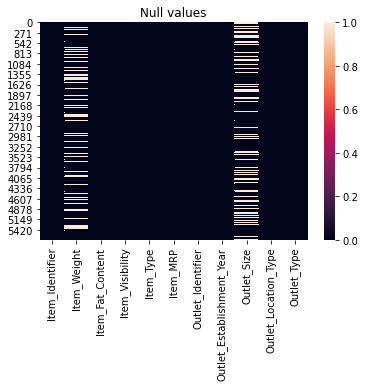

In [84]:
sns.heatmap(df_test.isnull())
plt.title("Null values")
plt.show()

Observations: Null values present in Item_Weight and Outlet_Size.

In [85]:
#Filling Null values as per category using pivot
#filling Item_Weight as per Item_Identifier

item_weight_mean= df_test.pivot_table(values='Item_Weight', index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [86]:
miss_item_weight= df_test['Item_Weight'].isnull()
miss_item_weight

0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

In [87]:
for i, item in enumerate(df_test['Item_Identifier']):
    if miss_item_weight[i]:
        if item in item_weight_mean:
            df_test['Item_Weight'][i]= item_weight_mean.loc[item]['Item_Weight']
        else:
            df_test['Item_Weight'][i]= np.mean(df_test['Item_Weight'])

In [88]:
df['Item_Weight'].isnull().sum()

0

In [89]:
#Filling Null values as per category using pivot
#filling outlet_size as per outlet_type

outlet_size_mode= df_test.pivot_table(values= 'Outlet_Size', columns='Outlet_Type', aggfunc= (lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [90]:
miss_Outlet_Size= df_test['Outlet_Size'].isnull()
df_test.loc[miss_Outlet_Size, 'Outlet_Size'] = df_test.loc[miss_Outlet_Size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [91]:
df_test['Outlet_Size'].isnull().sum()

0

In [92]:
sum(df_test['Item_Visibility']==0)

353

In [93]:
#Replace zeros with mean
df_test.loc[:,'Item_Visibility'].replace([0], [df_test['Item_Visibility'].mean()], inplace=True)

In [94]:
sum(df_test['Item_Visibility']==0)

0

In [95]:
#Creation of New attributes

df_test['New_Item_Type']= df_test['Item_Identifier'].apply(lambda x: x[:2])
df_test['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [96]:
df_test['New_Item_Type']= df_test['New_Item_Type'].map({'FD':'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})
df_test['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [97]:
df_test.loc[df_test['New_Item_Type']== 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df_test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [98]:
#Create Small values for Establishment year

df_test['Outlet_Years']= 2013- df_test['Outlet_Establishment_Year']
df_test['Outlet_Years']

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 5681, dtype: int64

# EDA

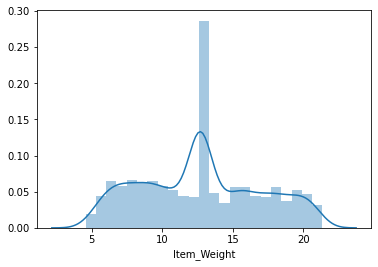

In [99]:
#1) Analysis of Numerical Data
sns.distplot(df_test['Item_Weight'])

Observations: Max Item_Weight is distributed in between 7 to 20.

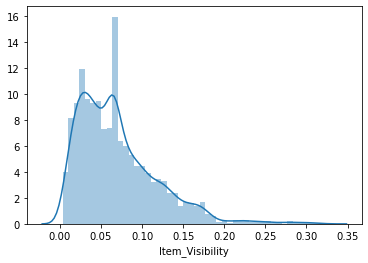

In [100]:
sns.distplot(df_test['Item_Visibility'])

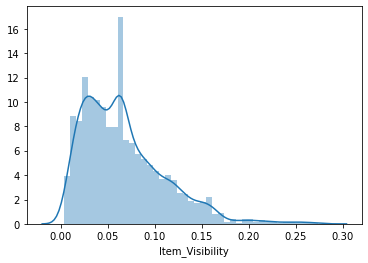

In [101]:
# Removing skewness of Item_Outlet_Sales

df_test['Item_Visibility']= np.log(1+df_test['Item_Visibility'])
sns.distplot(df_test['Item_Visibility'])

Observations: Here we have some right skewd values. At centre max density arises as we filled zero values by mean.

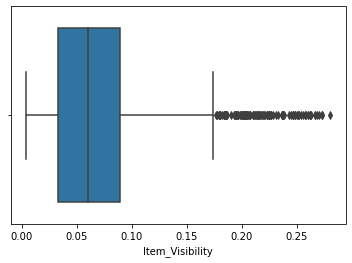

In [102]:
sns.boxplot(df_test['Item_Visibility'])

Observations: Here we have some outliers present in Item_Visibility.

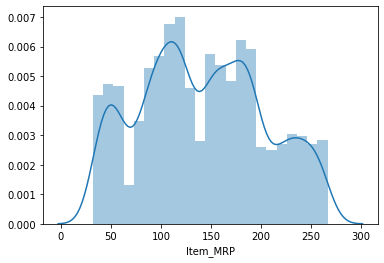

In [103]:
sns.distplot(df_test['Item_MRP'])

Observations: Prize of Item is ranges from around 30 to 260.

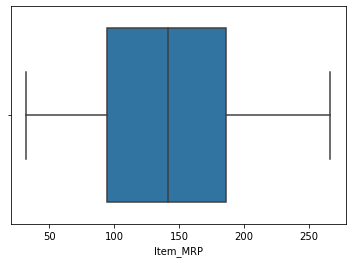

In [104]:
sns.boxplot(df_test['Item_MRP'])

Observations: No outliers present in Item_MRP

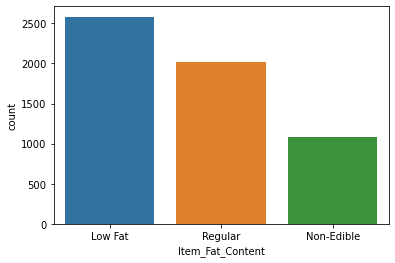

In [105]:
# 2) Analysis of Categorical Data

sns.countplot(df_test['Item_Fat_Content'])

Observations: Most of Items are Low Fat contains and less are Non-Edible.

[Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Dairy'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Seafood'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Breakfast')]

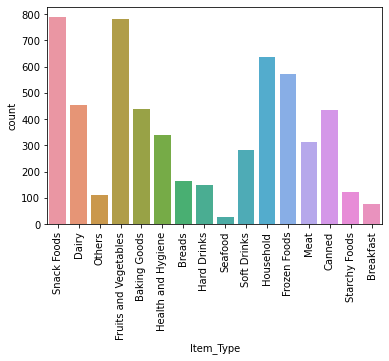

In [106]:
l= list(df_test['Item_Type'].unique())
sns.countplot(df_test['Item_Type']).set_xticklabels(labels= l, rotation=90)


Observations: Maximum Item_Type are Fruits-Vegetables and Snack Foods.

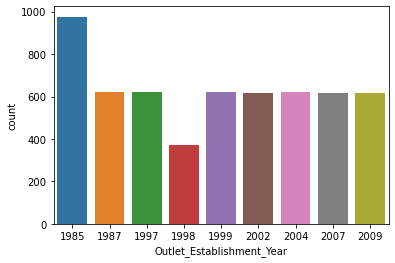

In [107]:
sns.countplot(df_test['Outlet_Establishment_Year'])

Observations: Here for 1985 we have more count and 1998 have less count, otherthan this all having equal count for Outlet establishment.

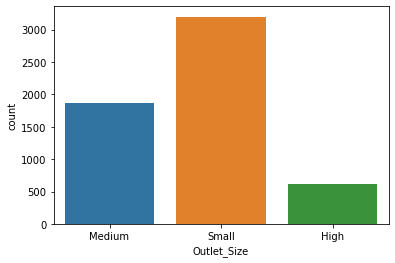

In [108]:
sns.countplot(df_test['Outlet_Size'])

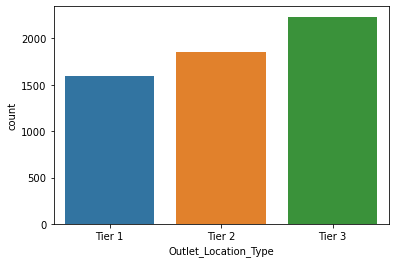

In [109]:
sns.countplot(df_test['Outlet_Location_Type'])

Observatons: Here almost eqaul distribution present.

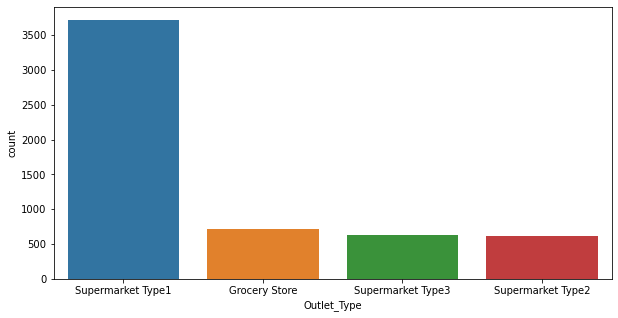

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(df_test['Outlet_Type'])

In [111]:
#Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['Outlet']= le.fit_transform(df_test['Outlet_Identifier'])
col= ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']

for i in col:
    df_test[i]=le.fit_transform(df_test[i])
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,FDW58,20.750000,0,0.007536,13,107.8622,OUT049,1999,1,0,1,1,14,9
1,FDW14,8.300000,2,0.037708,4,87.3198,OUT017,2007,2,1,1,1,6,2
2,NCN55,14.600000,1,0.094924,11,241.7538,OUT010,1998,2,2,0,2,15,0
3,FDQ58,7.315000,0,0.015271,13,155.0340,OUT017,2007,2,1,1,1,6,2
4,FDY38,12.695633,2,0.112077,4,234.2300,OUT027,1985,1,2,3,1,28,5


In [112]:
df_test_new= df_test.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)
df_test_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,20.750000,0,0.007536,13,107.8622,1,0,1,1,14,9
1,8.300000,2,0.037708,4,87.3198,2,1,1,1,6,2
2,14.600000,1,0.094924,11,241.7538,2,2,0,2,15,0
3,7.315000,0,0.015271,13,155.0340,2,1,1,1,6,2
4,12.695633,2,0.112077,4,234.2300,1,2,3,1,28,5


In [113]:
#Removing the Outliers

from scipy.stats import zscore
z= np.abs(zscore(df_test_new))
threshold=3
df_test_new= df_test_new[(z<3).all(axis=1)]
df_test_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,20.750000,0,0.007536,13,107.8622,1,0,1,1,14,9
1,8.300000,2,0.037708,4,87.3198,2,1,1,1,6,2
2,14.600000,1,0.094924,11,241.7538,2,2,0,2,15,0
3,7.315000,0,0.015271,13,155.0340,2,1,1,1,6,2
4,12.695633,2,0.112077,4,234.2300,1,2,3,1,28,5
...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013406,13,141.3154,2,0,1,1,16,8
5677,7.600000,2,0.133648,15,169.1448,1,2,2,1,4,3
5678,10.000000,1,0.070951,8,118.7440,2,1,1,2,11,7
5679,15.300000,2,0.063617,3,214.6218,2,1,1,1,6,2


In [114]:
df_test.shape

(5681, 14)

In [115]:
df_test_new.shape

(5600, 11)

Observations: Almost 81 rows has been removed due to outliers.

In [116]:
# Standardization of Data

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_x= scaler.fit_transform(df_test_new)
new_x= pd.DataFrame(data= scaled_x, columns= df_test_new.columns)
new_x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,1.888840,-1.005455,-1.428438,1.363909,-0.538563,-0.650946,-1.377862,-0.277213,-0.192606,-0.128501,1.498198
1,-1.032779,1.234222,-0.666445,-0.767463,-0.871149,0.809509,-0.142507,-0.277213,-0.192606,-1.085897,-0.975450
2,0.445631,0.114383,0.778571,0.890271,1.629171,0.809509,1.092848,-1.544474,1.719793,-0.008826,-1.682207
3,-1.263927,-1.005455,-1.233091,1.363909,0.225158,0.809509,-0.142507,-0.277213,-0.192606,-1.085897,-0.975450
4,-0.001263,1.234222,1.211794,-0.767463,1.507359,-0.650946,1.092848,2.257309,-0.192606,1.546944,0.084685
...,...,...,...,...,...,...,...,...,...,...,...
5595,-0.516509,1.234222,-1.280192,1.363909,0.003051,0.809509,-1.377862,-0.277213,-0.192606,0.110849,1.144820
5596,-1.197046,1.234222,1.756584,1.837547,0.453615,-0.650946,1.092848,0.990048,-0.192606,-1.325247,-0.622072
5597,-0.633843,0.114383,0.173128,0.179813,-0.362385,0.809509,-0.142507,-0.277213,1.719793,-0.487524,0.791441
5598,0.609899,1.234222,-0.012101,-1.004282,1.189898,0.809509,-0.142507,-0.277213,-0.192606,-1.085897,-0.975450


In [117]:
#Loading model

rfr_model= joblib.load('big_data_mart_best_RFR_model.obj')

In [118]:
pred_test= rfr_model.predict(new_x)
pred_test

array([5.70186397, 5.51343279, 5.52903455, ..., 5.73877685, 5.51343279,
       5.74673187])

In [119]:
pred_test[0]

5.701863968114872

In [120]:
pred_test[1527]

5.758303125227551